In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# 컨볼루션 신경망 테스트 !
# 데이터 불러오기
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train_new = x_train.reshape(x_train.shape[0],28,28,1).astype('float32') / 255
x_test_new = x_test.reshape(x_test.shape[0],28,28,1).astype('float32') / 255

y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

# 모델 설정
model = Sequential()

# 컨볼루션 신경망 사용하기
# 32:커널의 갯수 , (3:3):커널의 크기
# input_shape = (행,열,색상 또는 흑백) : (28,28,?) > 1이 디폴트 값이라 디폴트 값을 사용함. 흑백이면 1 , 색상이면 3
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,(3,3),activation="relu"))

# 맥스 풀링으로 데이터 풀을 축소시키고, 최대값을 뽑아옴
# pool_size 를 통해 풀링 창의 크기
# (2,2)는 가로2,세로2 크기의 풀링 창을 통해 맥스 풀링을 진행
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # 노드의 25%를 비활성화 하겠다.
model.add(Flatten()) # 2차원을 1차원으로 차원 변경하여 사용 . 28*28 > 784

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

# 모델 최적화
modelpath = './data/model/MINST_CNN.hdf5'
cp = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
esc = EarlyStopping(monitor='val_loss',patience=10)

# 모델 실행 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train_new,y_train_new,epochs=30,batch_size=200,verbose=0,validation_split=0.25,callbacks=[esc,cp])


Epoch 1: val_loss improved from inf to 0.07468, saving model to ./data/model\MINST_CNN.hdf5


C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.07468 to 0.06084, saving model to ./data/model\MINST_CNN.hdf5

Epoch 3: val_loss improved from 0.06084 to 0.05027, saving model to ./data/model\MINST_CNN.hdf5

Epoch 4: val_loss improved from 0.05027 to 0.04745, saving model to ./data/model\MINST_CNN.hdf5

Epoch 5: val_loss improved from 0.04745 to 0.04340, saving model to ./data/model\MINST_CNN.hdf5

Epoch 6: val_loss improved from 0.04340 to 0.04290, saving model to ./data/model\MINST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.04290

Epoch 8: val_loss improved from 0.04290 to 0.04064, saving model to ./data/model\MINST_CNN.hdf5

Epoch 9: val_loss improved from 0.04064 to 0.04063, saving model to ./data/model\MINST_CNN.hdf5

Epoch 10: val_loss improved from 0.04063 to 0.04057, saving model to ./data/model\MINST_CNN.hdf5

Epoch 11: val_loss improved from 0.04057 to 0.03886, saving model to ./data/model\MINST_CNN.hdf5

Epoch 12: val_loss did not improve from 0.03886

Epoch 13: val_loss did not 

In [119]:
# 테스트 정확도 출력
model.evaluate(x_test_new,y_test_new)

ValueError: in user code:

    File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv1d_3' (type Conv1D).
    
    Negative dimension size caused by subtracting 5 from 1 for '{{node sequential_38/conv1d_3/Conv1D/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_38/conv1d_3/Conv1D/Reshape, sequential_38/conv1d_3/Conv1D/ExpandDims_1)' with input shapes: [?,1,1,100], [1,5,100,64].
    
    Call arguments received by layer 'conv1d_3' (type Conv1D):
      • inputs=tf.Tensor(shape=(None, 28, 28, 1, 100), dtype=float32)


In [86]:
from PIL import Image
# 이미지 전처리
image_path = 'img6.jpg'
image = Image.open(image_path)
image = image.convert('L')  # 흑백 이미지로 변환
image = image.resize((28, 28))  # 28x28 크기로 조정
image = np.asarray(image)
image = image.reshape(1,28,28,1).astype('float32') / 255

# abs : 절대값. 음수를 가지지 않는다
if image[0,0,0,0] > 0:
    image = abs(1 - image)
    
# 예측하기
prediction = model.predict(image)
digit = np.argmax(prediction)
print("예측 결과:", digit)

1/1 [==============================] - 0s 68ms/step
예측 결과: 5


In [51]:
# 순환 신경망(Recurrent Neural Network, RNN) => LSTM(Long Short Term Memory)
# 입력된 값에 맞는 결과를 가져올 때 까지 한 곳에서 순환
# 첫번째 입력 값에 맞는 결과 값이 나올 떄까지 계속 순환
# 첫번째 입력 값에 대한 결과 값이 두번째 입력 값으로 맞는 결과를 가져올 때 까지 순환
# 첫번째 결과값 그리고 두번째 결과값과 함께 세번째 입력값에 맞는 결과를 가져올 때까지 순환
# 이와 같은 방법으로 반복
# RNN은 앞에 결과가 뒤 입력값에 영향을 준다.
# 앞에 결과값을 관리할 필요가 있어서 LSTM을 이용해서 결과값을 관리하게한다.

In [124]:
# RNN , LSTM 사용해보기
# 로이터 뉴스 데이터셋
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Embedding,LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 불러오기

# 학습셋,테스트셋
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=1000,test_split=0.2)

# 카테고리 갯수 찾기
cate = np.max(y_train) + 1

# 단어의 수를 맞추기
x_train = sequence.pad_sequences(x_train,maxlen=100)
x_test = sequence.pad_sequences(x_test,maxlen=100)

# 원 - 핫 인코딩
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

# 학습 조기 중단
esc = EarlyStopping(monitor='val_loss',patience=5)

# 모델 구성
model = Sequential()
#     Embedding(불러온 단어의 총 수,기사당 단어 수(카테고리 별))
model.add(Embedding(1000,100))
# LSTM(기사당 단어 수,기타 옵션)
model.add(LSTM(100,activation='tanh')) # RNN 사용시 activation은 tanh 으로
model.add(Dense(46,activation='softmax'))

# 모델 실행
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train_new,epochs=200,batch_size=20,verbose=1,validation_data=(x_test,y_test_new),callbacks=[esc])

Epoch 1/200
450/450 [==============================] - 14s 26ms/step - loss: 2.2137 - accuracy: 0.4264 - val_loss: 2.1645 - val_accuracy: 0.4804
Epoch 2/200
450/450 [==============================] - 11s 25ms/step - loss: 1.9093 - accuracy: 0.5117 - val_loss: 1.7648 - val_accuracy: 0.5280
Epoch 3/200
450/450 [==============================] - 11s 25ms/step - loss: 1.7165 - accuracy: 0.5534 - val_loss: 1.7377 - val_accuracy: 0.5552
Epoch 4/200
450/450 [==============================] - 11s 25ms/step - loss: 1.6051 - accuracy: 0.5921 - val_loss: 1.5332 - val_accuracy: 0.6149
Epoch 5/200
450/450 [==============================] - 12s 26ms/step - loss: 1.4397 - accuracy: 0.6312 - val_loss: 1.4644 - val_accuracy: 0.6269
Epoch 6/200
450/450 [==============================] - 12s 26ms/step - loss: 1.3373 - accuracy: 0.6541 - val_loss: 1.4032 - val_accuracy: 0.6380
Epoch 7/200
450/450 [==============================] - 12s 26ms/step - loss: 1.2394 - accuracy: 0.6853 - val_loss: 1.3057 - val_ac

In [125]:
# 정확도 테스트
model.evaluate(x_test,y_test_new)[1]

71/71 [==============================] - 1s 11ms/step - loss: 1.2299 - accuracy: 0.7280


0.7279608249664307

In [ ]:
# LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Activation,Conv1D,MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터를 불러온 이후 학습 셋, 테스트 셋으로 변경
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞춰주기
x_train = sequence.pad_sequences(x_train,maxlen=500)
x_test = sequence.pad_sequences(x_test,maxlen=500)

# 모델 구조 설정
model = Sequential()

model.add(Embedding(5000,100)) # RNN
model.add(Dropout(0.5))

# Conv1D : 1차원 / Conv2D : 2차원
model.add(Conv1D(64, 5, padding='valid',activation='relu')) # CNN
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(55)) # LSTM
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 학습의 조기 중단 설정
esc = EarlyStopping(monitor='val_loss',patience=5)

# 모델 실행 옵션 정함
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=20,verbose=1,validation_data=(x_test,y_test),callbacks=[esc])

Epoch 1/200
1250/1250 [==============================] - 61s 47ms/step - loss: 0.3700 - accuracy: 0.8277 - val_loss: 0.2661 - val_accuracy: 0.8908
Epoch 2/200
1250/1250 [==============================] - 59s 47ms/step - loss: 0.2314 - accuracy: 0.9112 - val_loss: 0.2683 - val_accuracy: 0.8896
Epoch 3/200
1250/1250 [==============================] - 58s 47ms/step - loss: 0.1830 - accuracy: 0.9305 - val_loss: 0.2796 - val_accuracy: 0.8892
Epoch 4/200
1250/1250 [==============================] - 58s 46ms/step - loss: 0.1458 - accuracy: 0.9473 - val_loss: 0.3301 - val_accuracy: 0.8787
Epoch 5/200
 899/1250 [====================>.........] - ETA: 12s - loss: 0.1112 - accuracy: 0.9607

In [114]:
# 테스트 정확도 분석
model.evaluate(x_test,y_test)

782/782 [==============================] - 11s 14ms/step - loss: 0.3553 - accuracy: 0.8764


[0.355317622423172, 0.8763599991798401]

In [118]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 입력 텍스트에 대한 토크나이저 피팅 수정
input_text = ["오늘 출근길에 차 "]
tokenizer = Tokenizer(num_words=1000)
# X_train이 아닌 input_text에 대해 피팅하도록 변경
tokenizer.fit_on_texts(input_text)  
input_sequence = tokenizer.texts_to_sequences(input_text)
input_sequence_padded = pad_sequences(input_sequence, maxlen=100)
# 훈련된 모델을 사용하여 예측
predictions = model.predict(input_sequence_padded)
# 예측된 카테고리 인덱스 가져오기
predicted_category_index = np.argmax(predictions[0])
# 인덱스를 원래 카테고리로 매핑 # 날씨 , 주식, 사회, 정치
print(f"예측된 카테고리 인덱스: {predicted_category_index}")

1/1 [==============================] - 0s 21ms/step
예측된 카테고리 인덱스: 0


1/1 [==============================] - 0s 99ms/step
0.7121666669845581 0.6196262240409851
1/1 [==============================] - 0s 25ms/step
0.463114395737648 0.2823020815849304
1/1 [==============================] - 0s 28ms/step
0.4327559880912304 0.060961298644542694
1/1 [==============================] - 0s 27ms/step
0.5335440626367927 0.018204335123300552
1/1 [==============================] - 0s 24ms/step
0.6429341537877917 0.028686674311757088
1/1 [==============================] - 0s 26ms/step
0.5866285841912031 0.10643203556537628
1/1 [==============================] - 0s 26ms/step
0.48301396146416664 0.405778706073761
1/1 [==============================] - 0s 32ms/step
0.47906339168548584 0.6819260716438293
1/1 [==============================] - 0s 25ms/step
0.4979052245616913 0.800444483757019
1/1 [==============================] - 0s 31ms/step
0.4871736615896225 0.8056141138076782
1/1 [==============================] - 0s 29ms/step
0.4457637816667557 0.7123115062713623
1/1 

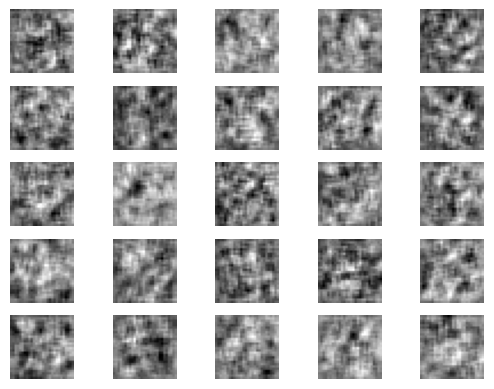

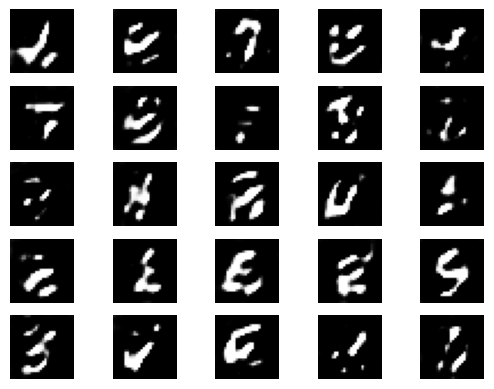

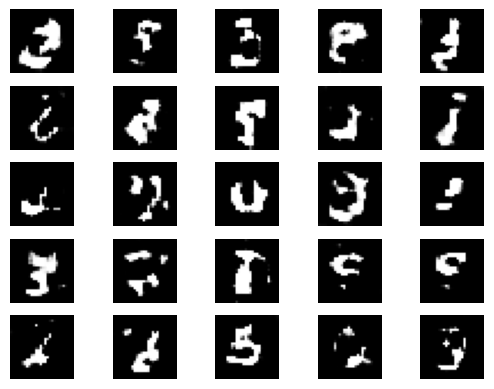

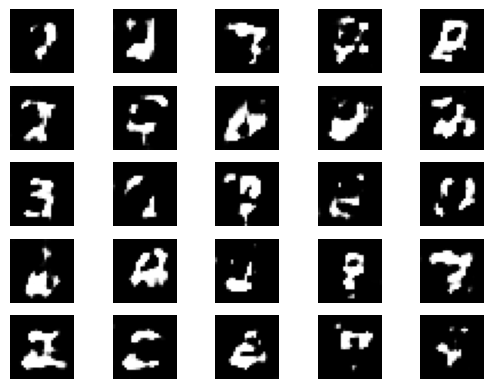

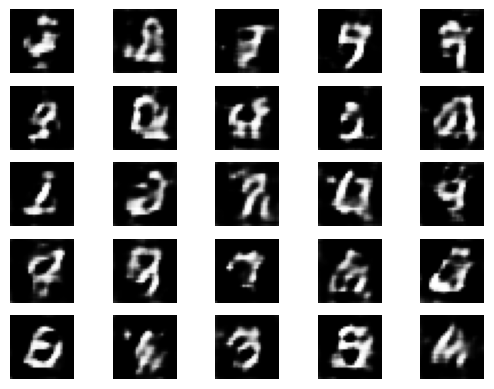

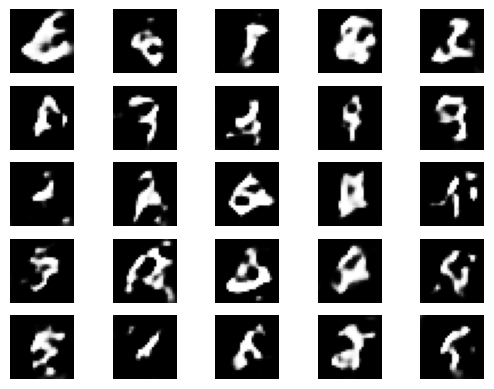

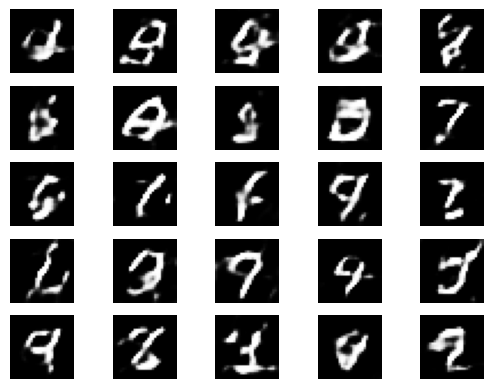

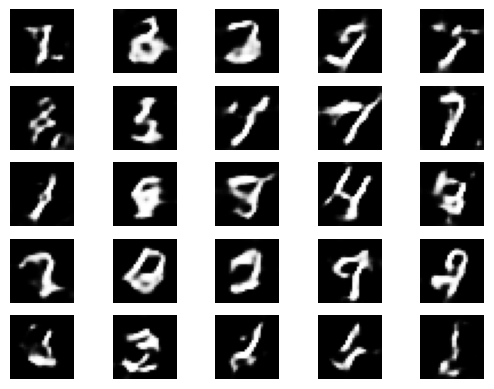

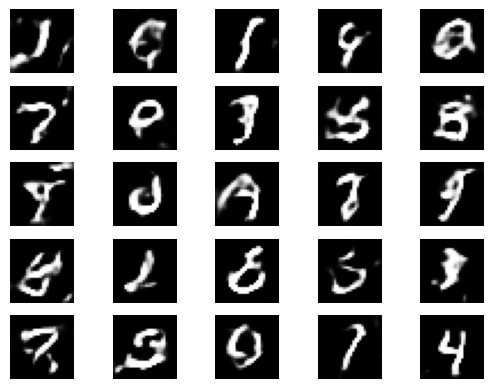

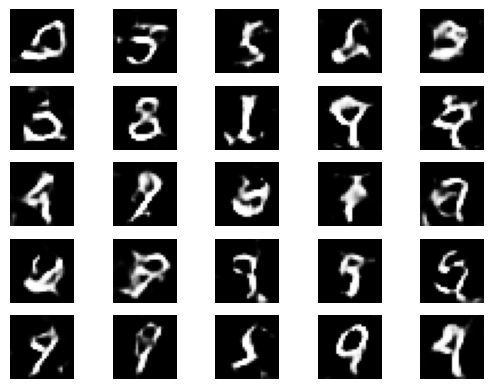

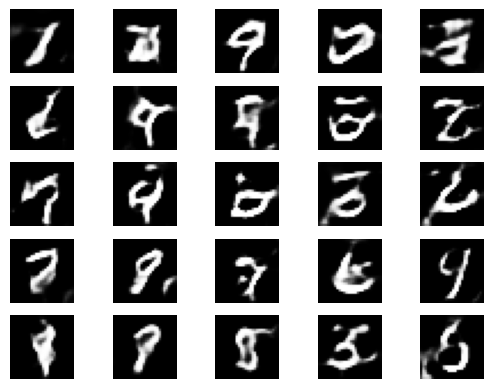

In [82]:
from tensorflow.keras.layers import BatchNormalization, Reshape, UpSampling2D, LeakyReLU, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
# 생산자 모델
generator = Sequential()
# 128은 임의의 수이고, 100차원으로 입력. 100이 아니어도 됨.
# GAN 에서는 relu 함수가 불안하기 때문에 LeakyReLU 함수 사용
# 이미지 크기가 28 * 28 이므로, 7 * 7 이라고 주었음.
generator.add(Dense(128 * 7 * 7,input_dim=100,activation='LeakyReLU'))

generator.add(BatchNormalization())
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D()) # 7 * 7 인 이미지를 14 * 14로 확장
generator.add(Conv2D(64,kernel_size=5,padding='same'))

generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D()) # 14 * 14 인 이미지를 28 * 28로 확장
generator.add(Conv2D(1,kernel_size=5,padding='same',activation='tanh'))
              
# 판별자 모델
discriminator = Sequential()

# 컨볼루션을 이용해서 제작
discriminator.add(Conv2D(64,kernel_size=5,strides = 2,input_shape=(28,28,1),padding='same'))  # strides = 커널이 움직일 때, 움직일 칸수를 의미.
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(128,kernel_size=5,strides = 2,padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))

discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

# 판별자 실행
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

# 판별자는 학습을 해서는 안됨.
discriminator.trainable = False

# 생산자와 판별자 모델을 연결시키는 GAN 모델을 생성
ginput = Input(shape=(100,)) # input_dim=100

# 판별자에게 생산자가 만든 값을 전달해줌
dis_output = discriminator(generator(ginput))
gan = Model(ginput,dis_output)


gan.compile(loss='binary_crossentropy',optimizer='adam')

epochs = 2001
batch_size = 32

# MNIST 데이터 불러오기
(x_train,_),(_,_) = mnist.load_data()

# 가로 세로 28 픽셀이고 흑색이므로 1
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')

# 255로 나누면 0 ~ 1 이 됨. -1 ~ 1 사이의 값을 가지도록 만들고 싶음. (생산자와 판별자가 있는 GAN 모델을 사용하기 위해서는 -1 ~ 1 사이의 값이어야 함.)
x_train = (x_train - 127) / 127

# 거짓과 참 판별하기 위한 32행 1열
true = np.ones((batch_size,1))
fake = np.zeros((batch_size,1))

# 학습 및 
for i in range(epochs):
    # 실제 데이터를 판별자에게 입력하는 부분 > 판별자에게 이미지를 랜덤하게 전달
    idx = np.random.randint(0,x_train.shape[0],batch_size)
    imgs = x_train[idx]
    # 랜덤으로 불러온 이미지를 판별자에게 전달
    # train_on_batch : 판별시작
    d_loss_real = discriminator.train_on_batch(imgs,true)

    # 임의의 숫자 데이터 0 ~ 1
    # 가짜 데이터 생성
    noise = np.random.normal(0,1,(batch_size,100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs,fake)

    # 판별자와 생산자의 오차 계산
    d_loss = 0.5*np.add(d_loss_real,d_loss_fake)
    g_loss = gan.train_on_batch(noise,true)
    print(d_loss,g_loss)
    
    if i % 200 == 0:
        noise = np.random.normal(0,1,(25,100))
        gen_imgs = generator(noise)

        gen_imgs = 0.5 * gen_imgs + 0.5
        
        fig , axs = plt.subplots(5,5)
        count = 0
        for j in range(5):
            for k in range(5):
                axs[j,k].imshow(gen_imgs[count,:,:,0],cmap='gray')
                axs[j,k].axis('off')
                count += 1

        fig.savefig(f'./data/gan_images/gan_mnist_{i}.png')